<h2> Naive Bayes </h2> 

Lets say we get spam and valid emails. 

The first thing we do is make a histogram of all the words that occur in the valid emails. We can use the histogram to calculate the probability that a word occurs in a normal message. 

We calculate the probability of each word occuring given the total number of occurences. 

We do the same for the spam emails too 

As the probabilities of these words are discrete probabilities, they are called likelihoods. 


We start with assuming that any message is a normal valid email. 

Given that we have 8 emails of Valid messages and 4 of Spam messages in this example, the probability of a Valid email is 8/12 = 0.67. This initial guess is called a prior probability.  

We also calculate the probability o the incoming email being spam, the same way. Given 4 are spam, your probability is 4/12 = 0.33.


There can be situations where a word doesnt exist in the spam email histogram, resulting in the entire probability of a particular email being spam being zero. However this same email may have another word which is of high probability in the spam histogram. Yet as the probability of one word is zero, the entire probability becomes zero. To handle this we add one count to each word regardless. 


<h3> Why is Naive Byes naive </h3>

It treats all word orders the same. 

P(N) x P(Friend|N) x P(Dear|N) == P(N) x P(Dear|N) x P(Friend|N) 


Due t ignoring relationships among words, Naive Bayes is said to have high bias , but as it performs surprisingly well, it is said to have low variance.


<h3> Natural Language Processing </h3> 

Process of converting language into number which the computer understands. 


In [3]:
import nltk

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Tokenizing - word tokenizer and sentence tokenizer. A word tokenizer separates by words, and sentence tokenizer separates by sentence. 

Corpora - Body of text. eg: medical journals, presidential speeches

Lexicon - words and their means according to their context
E.g.: Investor speak 'bull' vs normal speak 'bull'

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize

example_text = "Hello there, how are you doing today? The weather is great and Python is awesome. The sky is pinkish-blue. You should not eat cardboard. "

example_text2 = "Hello Mr.Smith, how are you doing today? The weather is great and Python is awesome. The sky is pinkish-blue. You should not eat cardboard. "

In [21]:
print(sent_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great and Python is awesome.', 'The sky is pinkish-blue.', 'You should not eat cardboard.']


In [22]:
print(sent_tokenize(example_text2))

['Hello Mr.Smith, how are you doing today?', 'The weather is great and Python is awesome.', 'The sky is pinkish-blue.', 'You should not eat cardboard.']


In [23]:
print(word_tokenize(example_text))

['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', 'not', 'eat', 'cardboard', '.']


In [24]:
print(word_tokenize(example_text2))

['Hello', 'Mr.Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', 'not', 'eat', 'cardboard', '.']


In [34]:
import re

exp = re.sub(r'[.\?\.]','punct',example_text)

In [35]:
exp

'Hello there, how are you doing todaypunct The weather is great and Python is awesomepunct The sky is pinkish-bluepunct You should not eat cardboardpunct '

<h3> Stop Words </h3> 

Words that are not required as they do not add additional value to the words. It is best to remove such words as it reduces processing time

In [36]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [42]:
example_sentence = "This is an example showing stop word filtration."
#here we select our stop words as english
stop_words = set(stopwords.words("english"))

In [43]:
words = word_tokenize(example_sentence)
filtered_sentence = []

In [44]:
filtered_sentence = [i for i in words if i not in stop_words]

In [45]:
filtered_sentence

['This', 'example', 'showing', 'stop', 'word', 'filtration', '.']

<h3> Stemming </h3> 

Take the root stem of the word, and remove the letters like "..ing". There are different variations of the word due to a stem, but the word meanings are the same.

In [46]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [47]:
ps = PorterStemmer()
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

In [48]:
for w in example_words:
    print(ps.stem(w))

python
python
python
python
pythonli


In [49]:
new_text = "It is very important to be pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once."

In [50]:
words = word_tokenize(new_text)
for w in words:
    print(ps.stem(w))

it
is
veri
import
to
be
pythonli
while
you
are
python
with
python
.
all
python
have
python
poorli
at
least
onc
.


<h3> Speech Tagging </h3> 

Labelling speech in every word. 

In [51]:
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

In [ ]:
sample_text = state_union.raw("2006-GWBush.txt")
#training on the sample_text
custom_sent_tokenizer = PunktSentenceTokenizer(sample_text)

In [104]:
start = [0,0]
depth = 5
line_size = 4





In [105]:
import math
def plot(axess,x,y):
    axess.plot(x,y)
coordinates = []
def draw_triangles(start, depth, current_depth,line_size):
    if(current_depth <= depth):
        current_depth += 1
        new_points = [[start[0] + (line_size/2),start[1] - math.sqrt(line_size**2 - (line_size/2)**2)],[start[0] - (line_size/2),start[1] - math.sqrt(line_size**2 - (line_size/2)**2)]]
        for points in new_points:
            coordinates.append(points)
            #ax.plot(points[0],points[1],color = 'red')
            draw_triangles(points,depth,current_depth,line_size)
    else:
        return coordinates


In [110]:
coords = draw_triangles(start = [0,0],depth = 10,current_depth = 0,line_size = 4)

In [111]:
coordinates.insert(0,[0,0])

In [112]:
coord_list = list(zip(*(coordinates)))

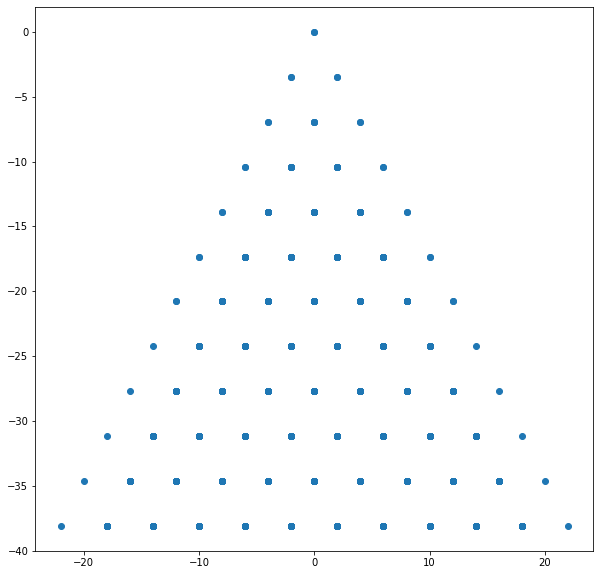

In [113]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.scatter(coord_list[0],coord_list[1])

In [138]:
email_exp = "my email is pasindu.samaranayake@yahoo.com bsls skd cjf pasindu.samaranayake@irescglobal.com"

In [139]:
import re
res = re.sub(r'([0-9a-zA-Z\._-]+@[0-9a-zA-Z\._-]+\.[0-9a-zA-Z\._-]+)','EMAIL',email_exp,flags=re.I|re.M|re.S)

In [140]:
res

'my email is EMAIL bsls skd cjf EMAIL'